Objective: to execute non-parametric estimation of team development from 2021 to 2023 to see how significant it is

Problem: really small-samples of execs (N=10 in 2023 and 11 in 2021) so traditional estimation of means does not work 

Outcome: for all comparisons. I would like us to focus on comparing the total delta observed (i.e,, sum of deltas 
Across all rows == 3.2) relative to those synthetically generated

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('data.xlsx')
df

,Michigan Model of Leadership Measurement,2021,2023,Delta,Mean,Stdev
0,Overall Team Performance (mean =3.41; st.dev=0...,3.4,3.7,0.3,3.41,0.73
1,Team is a role model for high-performing teams...,2.9,3.3,0.4,2.92,0.79
2,Blue/External Focus and Results Overall (mean...,3.5,3.9,0.4,3.50,0.90
3,Motivated Effort Toward the Bottom Line (mean=...,3.7,3.9,0.2,3.69,0.86
4,External Focus (mean=3.42; st dev=1.02),3.4,3.8,0.4,3.42,1.02
5,Green (Innovation and Creativity) Overall ...,3.2,3.5,0.3,3.15,0.75
6,Curiosity and Learning (mean=3.41; st. dev.=0.77),3.4,3.7,0.3,3.41,0.77
7,Innovation and Creativity (mean=3.21; st.dev=0...,3.2,3.4,0.2,3.21,0.59
8,Conflict Management (mean=2.92; st.dev=0.77),2.9,3.5,0.6,2.92,0.77
9,Yellow (Collaboration and Relationships) Overa...,3.6,3.7,0.1,3.60,0.75


Approach 1: 
- Keep 2023 constant. 
- For each corresponding value in 2021, pull the value at random from the normal distribution with the mean and sd for that specific value
- Record the value and calculate delta for each row (could be positive or negative)
- Calculate the sum of  deltas across all rows
- Record the sum of deltas
- Repeat 10,000 times 
- Rank order the 10,000 cumulative deltas from the lowest  to the highest
- Place the actual delta (3.2) on that distribution and record the percentile 

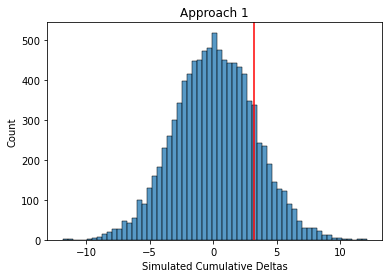

Percentile of actual delta: 83.44%


In [2]:
values_2021 = df[2021]
mean = df.Mean
sd = df.Stdev
actual_delta = df.Delta.sum()
simulations = 10000

# Calculate the cumulative delta for each simulation
cumulative_deltas = []
for i in range(simulations):
    deltas = []
    for j, val in enumerate(values_2021):
        # Pull a random value from normal distribution for each value in 2021
        random_val = np.random.normal(mean[j], sd[j])
        # Calculate the delta
        delta = random_val - val
        deltas.append(delta)
    cumulative_deltas.append(sum(deltas))

cumulative_deltas.sort()

ax = sns.histplot(cumulative_deltas)
ax.set(xlabel='Simulated Cumulative Deltas', title='Approach 1')
plt.axvline(x = actual_delta, color = 'r', label = 'real cummulative delta')
plt.show()

# Calculate the percentile of actual delta
percentile = (np.sum(cumulative_deltas <= actual_delta) / len(cumulative_deltas)) * 100
print("Percentile of actual delta: {:.2f}%".format(percentile))

Approach 2: 
- For each observable delta in row, generate the counterpart with opposite sign. That is for overall team performance it would -0.3; team role model =-0.4; for last row it would be +0.1
- Pull the observed and the generated values together in a distribution (N=2x the regular number of deltas). 
- From this distribution randomly pull 16 values of delta (equivalent of the number of rows)
- Calculate and record the sum of deltas. 
- Repeat 10,000 times 
- Rank order 10,000 sums of deltas from lowest to highest
- Place the actual delta 3.2 on that distribution of 10,000 deltas and report the percentile. 

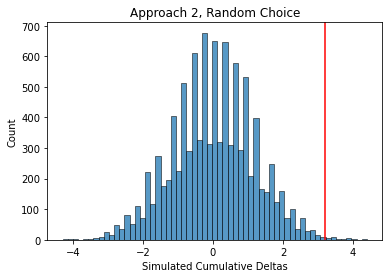

Percentile of actual delta: 99.66%


In [3]:
# Combine the observed and generated deltas into a distribution
observable_deltas = df.Delta.to_numpy()
counterpart_deltas = observable_deltas * -1
deltas = np.concatenate((observable_deltas, counterpart_deltas))

# Calculate the sum of deltas for each simulation
sums_of_deltas = []
for i in range(simulations):
    # Randomly pull 16 values of delta
    random_deltas = np.random.choice(deltas, 16)
    sums_of_deltas.append(sum(random_deltas))

sums_of_deltas.sort()

ax = sns.histplot(sums_of_deltas)
ax.set(xlabel='Simulated Cumulative Deltas', title='Approach 2, Random Choice')
plt.axvline(x = actual_delta, color = 'r', label = 'real cummulative delta')
plt.show()

# Calculate the percentile of actual delta
percentile = (np.sum(sums_of_deltas <= actual_delta) / len(sums_of_deltas)) * 100
print("Percentile of actual delta: {:.2f}%".format(percentile))

Using normal distribution instead.

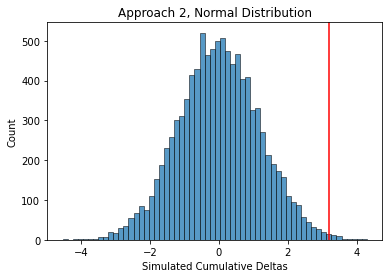

Percentile of actual delta: 99.63%


In [4]:
# Draw from normal distribution instead of 16 random choices
delta_mean = np.mean(deltas)
delta_stdev = np.std(deltas)

sums_of_deltas = []
for i in range(simulations):
    random_deltas = np.random.normal(delta_mean, delta_stdev, 16)
    sums_of_deltas.append(sum(random_deltas))

# Sort the sums of deltas
sums_of_deltas.sort()

ax = sns.histplot(sums_of_deltas)
ax.set(xlabel='Simulated Cumulative Deltas', title='Approach 2, Normal Distribution')
plt.axvline(x = actual_delta, color = 'r', label = 'real cummulative delta')
plt.show()

# Calculate the percentile of actual delta
percentile = (np.sum(sums_of_deltas <= actual_delta) / len(sums_of_deltas)) * 100
print("Percentile of actual delta: {:.2f}%".format(percentile))